In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("balabaskar/tom-and-jerry-image-classification")

print("Path to dataset files:", path)

100%|██████████| 435M/435M [00:06<00:00, 74.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/balabaskar/tom-and-jerry-image-classification/versions/3


In [2]:
import os

# path = "/kaggle/input/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry"

path = "/root/.cache/kagglehub/datasets/balabaskar/tom-and-jerry-image-classification/versions/3/tom_and_jerry/tom_and_jerry"

os.listdir(path)

['tom_jerry_1', 'tom_jerry_0', 'tom', 'jerry']

In [3]:
for dirpath, dirname, filename in os.walk(path):
  print(f'There are {len(dirname)} directories and {len(filename)} in {dirpath} ')

There are 4 directories and 0 in /root/.cache/kagglehub/datasets/balabaskar/tom-and-jerry-image-classification/versions/3/tom_and_jerry/tom_and_jerry 
There are 0 directories and 780 in /root/.cache/kagglehub/datasets/balabaskar/tom-and-jerry-image-classification/versions/3/tom_and_jerry/tom_and_jerry/tom_jerry_1 
There are 0 directories and 1528 in /root/.cache/kagglehub/datasets/balabaskar/tom-and-jerry-image-classification/versions/3/tom_and_jerry/tom_and_jerry/tom_jerry_0 
There are 0 directories and 1930 in /root/.cache/kagglehub/datasets/balabaskar/tom-and-jerry-image-classification/versions/3/tom_and_jerry/tom_and_jerry/tom 
There are 0 directories and 1240 in /root/.cache/kagglehub/datasets/balabaskar/tom-and-jerry-image-classification/versions/3/tom_and_jerry/tom_and_jerry/jerry 


In [4]:
import pathlib
import numpy as np

data_dir = pathlib.Path(path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['jerry' 'tom' 'tom_jerry_0' 'tom_jerry_1']


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_randomImage(dir_path, choice):
  targert_dir = os.path.join(dir_path, choice)
  random_img = random.sample(os.listdir(targert_dir),1)
  img = mpimg.imread(os.path.join(targert_dir, random_img[0]))

  plt.imshow(img)
  plt.title(f'Class: {choice}')
  plt.axis(False)
  plt.show()

In [6]:
x = random.choice(class_names)
print(x)

jerry


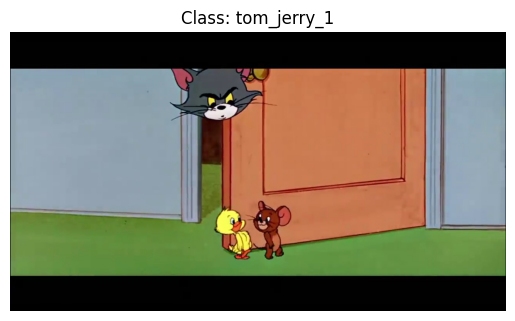

In [7]:
dir_path = path

view_randomImage(dir_path=dir_path, choice=random.choice(class_names))


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

In [9]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.5,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2,
                                   horizontal_flip=True)

# Training generator
train_data = train_datagen.flow_from_directory(
    dir_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=SEED
)

# Validation generator
val_data = train_datagen.flow_from_directory(
    dir_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    seed=SEED
)

Found 4383 images belonging to 4 classes.
Found 1095 images belonging to 4 classes.


In [10]:
def plot_curvers(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

In [11]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, Dense, Flatten, MaxPooling2D, BatchNormalization

In [ ]:
tf.random.set_seed(42)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(),
    Conv2D(48, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='relu'),
    Dense(4, activation='softmax')

])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_data, epochs=15, steps_per_epoch=len(train_data), validation_data=val_data, validation_steps=len(val_data))

Epoch 1/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 92s 615ms/step - accuracy: 0.3252 - loss: 1.3554 - val_accuracy: 0.3662 - val_loss: 1.3329
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 77s 563ms/step - accuracy: 0.3781 - loss: 1.3180 - val_accuracy: 0.3534 - val_loss: 1.3406
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 76s 556ms/step - accuracy: 0.3917 - loss: 1.3054 - val_accuracy: 0.3991 - val_loss: 1.2781
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 77s 563ms/step - accuracy: 0.4323 - loss: 1.2324 - val_accuracy: 0.4265 - val_loss: 1.1805
Epoch 5/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 79s 575ms/step - accuracy: 0.5496 - loss: 1.0158 - val_accuracy: 0.5233 - val_loss: 1.0481
Epoch 6/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 79s 578ms/step - accuracy: 0.5867 - loss: 0.9107 - val_accuracy: 0.6237 - val_loss: 0.8319
Epoch 7/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 79s 578ms/step - accuracy: 0.6390 - loss: 0.8246 - val_accuracy: 0.6009 - val_loss: 0.8511
Epoch 8/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 80s 583ms/step - accuracy: 0.6621 - loss: 0

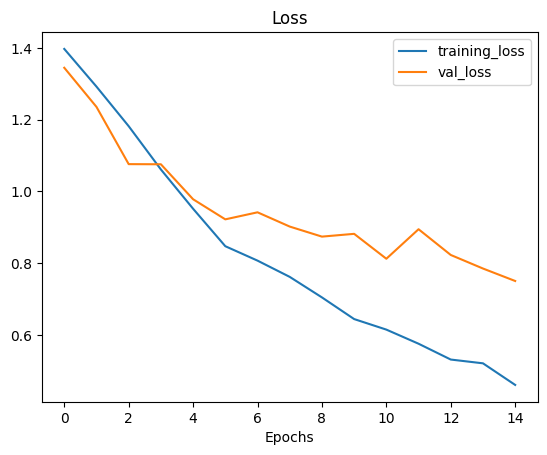

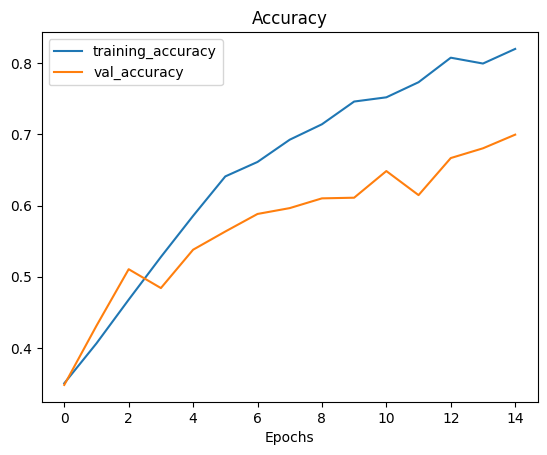

In [ ]:
plot_curvers(model.history)

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
tf.random.set_seed(42)

model2 = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(48, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(72, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='relu'),
    Dense(4, activation='softmax')
])

model2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


history = model2.fit(
    train_data,
    epochs=50,
    steps_per_epoch=len(train_data),
    validation_data=val_data,
    validation_steps=len(val_data),
    callbacks=[early_stop]
)

model2.save("best_model.h5")

Epoch 1/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 84s 573ms/step - accuracy: 0.3319 - loss: 1.3568 - val_accuracy: 0.3553 - val_loss: 1.3337
Epoch 2/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 74s 537ms/step - accuracy: 0.3616 - loss: 1.3236 - val_accuracy: 0.3799 - val_loss: 1.3085
Epoch 3/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 73s 531ms/step - accuracy: 0.4034 - loss: 1.2827 - val_accuracy: 0.4530 - val_loss: 1.1406
Epoch 4/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 74s 537ms/step - accuracy: 0.4914 - loss: 1.1400 - val_accuracy: 0.5562 - val_loss: 0.9514
Epoch 5/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 73s 531ms/step - accuracy: 0.5395 - loss: 1.0281 - val_accuracy: 0.5708 - val_loss: 0.8834
Epoch 6/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 73s 532ms/step - accuracy: 0.5729 - loss: 0.9457 - val_accuracy: 0.5379 - val_loss: 0.9624
Epoch 7/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 72s 528ms/step - accuracy: 0.5734 - loss: 0.9325 - val_accuracy: 0.5836 - val_loss: 0.8732
Epoch 8/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 73s 530ms/step - accuracy: 0.5661 - loss: 0

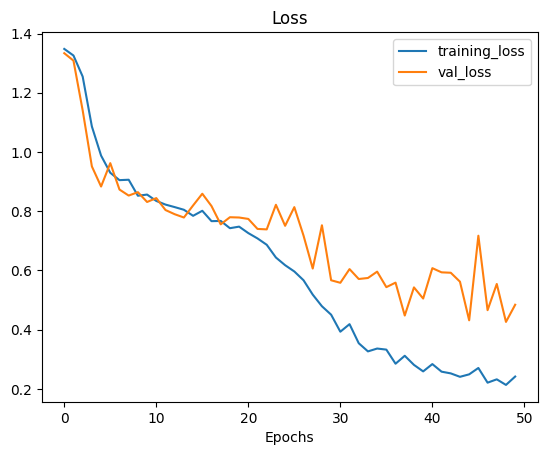

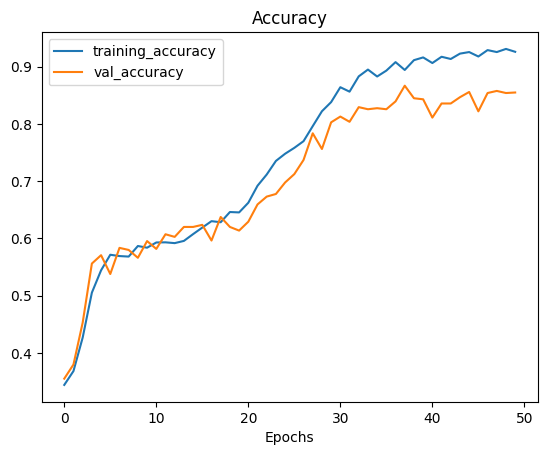

In [38]:
plot_curvers(model2.history)

In [37]:
from google.colab import files
files.download("best_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [19]:
def get_predicting_class(model, image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224,224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, 0)
    img_array = img_array / 255.0

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)

    plt.imshow(img)
    plt.title(f'Prediction: {predicted_class}, Confidence: {confidence}%')
    plt.axis('off')
    plt.show()

    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


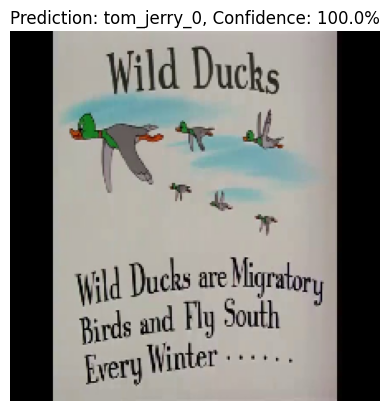

(np.str_('tom_jerry_0'), np.float32(100.0))

In [32]:
get_predicting_class(model, "/root/.cache/kagglehub/datasets/balabaskar/tom-and-jerry-image-classification/versions/3/tom_and_jerry/tom_and_jerry/tom_jerry_0/frame3145.jpg")

In [34]:
os.listdir('/root/.cache/kagglehub/datasets/balabaskar/tom-and-jerry-image-classification/versions/3/tom_and_jerry/tom_and_jerry/tom_jerry_0')[0:10]

['frame584.jpg',
 'frame1300.jpg',
 'frame45.jpg',
 'frame2190.jpg',
 'frame5146.jpg',
 'frame697.jpg',
 'frame3941.jpg',
 'frame4688.jpg',
 'frame4294.jpg',
 'frame1064.jpg']

In [21]:
!wget https://i.ytimg.com/vi/t0Q2otsqC4I/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD&rs=AOn4CLBgbkdHwq9v7C3DObsH54uBSf8hiw

--2025-12-29 16:36:22--  https://i.ytimg.com/vi/t0Q2otsqC4I/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD
Resolving i.ytimg.com (i.ytimg.com)... 142.250.101.119, 142.251.2.119, 74.125.137.119, ...
Connecting to i.ytimg.com (i.ytimg.com)|142.250.101.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73702 (72K) [image/jpeg]
Saving to: ‘hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD’

hq720.jpg?sqp=-oaym 100%[===================>]  71.97K  --.-KB/s    in 0.001s  

2025-12-29 16:36:22 (119 MB/s) - ‘hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD’ saved [73702/73702]



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 943ms/step


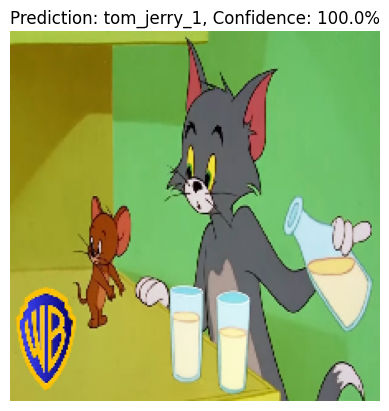

In [22]:
get_predicting_class(model, "/content/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD");

In [35]:
!wget https://i.ytimg.com/vi/yFR7qFOe9bk/maxresdefault.jpg

--2025-12-29 16:38:50--  https://i.ytimg.com/vi/yFR7qFOe9bk/maxresdefault.jpg
Resolving i.ytimg.com (i.ytimg.com)... 142.250.101.119, 142.251.2.119, 74.125.137.119, ...
Connecting to i.ytimg.com (i.ytimg.com)|142.250.101.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 126833 (124K) [image/jpeg]
Saving to: ‘maxresdefault.jpg.2’

maxresdefault.jpg.2 100%[===================>] 123.86K  --.-KB/s    in 0.001s  

2025-12-29 16:38:50 (132 MB/s) - ‘maxresdefault.jpg.2’ saved [126833/126833]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


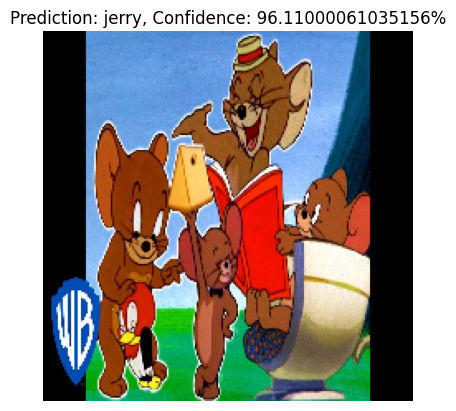

In [36]:
get_predicting_class(model, "/content/maxresdefault.jpg.2");

In [25]:
!wget https://i.ytimg.com/vi/yFR7qFOe9bk/maxresdefault.jpg

--2025-12-29 16:36:31--  https://i.ytimg.com/vi/yFR7qFOe9bk/maxresdefault.jpg
Resolving i.ytimg.com (i.ytimg.com)... 142.250.101.119, 142.251.2.119, 74.125.137.119, ...
Connecting to i.ytimg.com (i.ytimg.com)|142.250.101.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 126833 (124K) [image/jpeg]
Saving to: ‘maxresdefault.jpg.1’

maxresdefault.jpg.1 100%[===================>] 123.86K  --.-KB/s    in 0.001s  

2025-12-29 16:36:31 (82.6 MB/s) - ‘maxresdefault.jpg.1’ saved [126833/126833]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


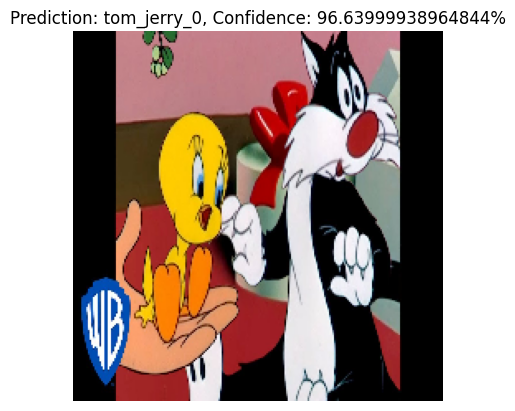

In [26]:
get_predicting_class(model, "/content/maxresdefault.jpg");

In [29]:
!wget https://i.pinimg.com/736x/b6/78/03/b67803378ba3c26bfc4b7168d5b3e5ad.jpg

--2025-12-29 16:36:52--  https://i.pinimg.com/736x/b6/78/03/b67803378ba3c26bfc4b7168d5b3e5ad.jpg
Resolving i.pinimg.com (i.pinimg.com)... 151.101.0.84, 151.101.64.84, 151.101.128.84, ...
Connecting to i.pinimg.com (i.pinimg.com)|151.101.0.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34902 (34K) [image/jpeg]
Saving to: ‘b67803378ba3c26bfc4b7168d5b3e5ad.jpg.1’

b67803378ba3c26bfc4 100%[===================>]  34.08K  --.-KB/s    in 0.002s  

2025-12-29 16:36:52 (19.8 MB/s) - ‘b67803378ba3c26bfc4b7168d5b3e5ad.jpg.1’ saved [34902/34902]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


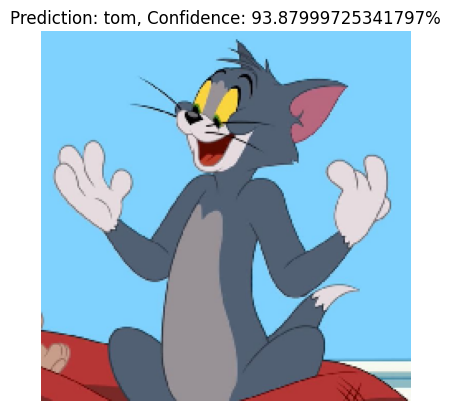

In [30]:
get_predicting_class(model, "/content/b67803378ba3c26bfc4b7168d5b3e5ad.jpg");